## Problem 2: Calculating NDVI (12 points)

In this problem, we will work with the same satellite imagery data as we used during the lesson. Specifically, we will explore the Sentinel-2 satellite image from Nuuksio National Park in Finland. The data is obtained from the [Copernicus Data Space Ecosystem](https://dataspace.copernicus.eu). Our objective is to explore, process the data, and ultimately calculate the NDVI (Normalized Difference Vegetation Index).

### What is NDVI?

NDVI (Normalized Difference Vegetation Index) is a simple, widely used index for assessing vegetation health and coverage based on satellite imagery. NDVI is calculated by comparing the Near Infrared (NIR) and Red bands of satellite data. Vegetation reflects more NIR light and absorbs more visible red light, so the NDVI value provides insight into the density and health of vegetation.

The formula to calculate NDVI is:

$$
NDVI = \frac{(NIR - Red)}{(NIR + Red)}
$$

- **NIR (Near Infrared)** corresponds to Band 8 for Sentinel-2 imagery.
- **Red** corresponds to Band 4 for Sentinel-2 imagery.

NDVI values range from -1 to +1, where higher values indicate healthier and denser vegetation.

### Sentinel-2 Band Reference

For Sentinel-2 imagery, the bands are predefined and consistent across products. Here is a quick reference for the Sentinel-2 bands:

| **Band**   | **Description**                     | **Wavelength (nm)** |
|------------|-------------------------------------|---------------------|
| Band 1     | Coastal aerosol                     | 443 nm              |
| Band 2     | Blue                                | 490 nm              |
| Band 3     | Green                               | 560 nm              |
| Band 4     | Red                                 | 665 nm              |
| Band 5     | Vegetation Red Edge                 | 705 nm              |
| Band 6     | Vegetation Red Edge                 | 740 nm              |
| Band 7     | Vegetation Red Edge                 | 783 nm              |
| Band 8     | Near Infrared                       | 842 nm              |
| Band 8A    | Narrow Near Infrared                | 865 nm              |
| Band 9     | Water Vapor                         | 945 nm              |
| Band 10    | Short-Wave Infrared – Cirrus        | 1375 nm             |
| Band 11    | Short-Wave Infrared                 | 1610 nm             |
| Band 12    | Short-Wave Infrared                 | 2190 nm             |

## (2a) - Read the raster and get the metadata (1 point)

As the first step read the raster file from data directory `data/sentinel2_Nuuksio_small.tif` as `sentinel_raster`. Provide the following information from the raster (use the same variable names and format):

```
data_crs = "the CRS of our raster data"
resolution = "as string in this format X*Y"
total_pixels = "total number of pixels across all bands as integer"
```

Remember to print the values. 

In [38]:
# ADD YOUR OWN CODE HERE
import rioxarray

sentinel_raster = rioxarray.open_rasterio('./data/sentinel2_Nuuksio_small.tif')

total_pixels = sentinel_raster.x.shape[0] * sentinel_raster.y.shape[0]
affine = sentinel_raster.rio.transform()
resolution = affine.a, affine.e
data_crs = sentinel_raster.rio.crs
print(data_crs)
print(resolution)
print(total_pixels)

EPSG:32635
(10.000423406593432, -9.998319640387246)
657930


## (2b) - Map NIR and RED bands (2 points)

Visualize the Near Infrared (NIR) and Red bands as individual raster plots (use subplots). You can decide what color you want to us efor your visulizations. 

Text(0.5, 1.0, 'NIR')

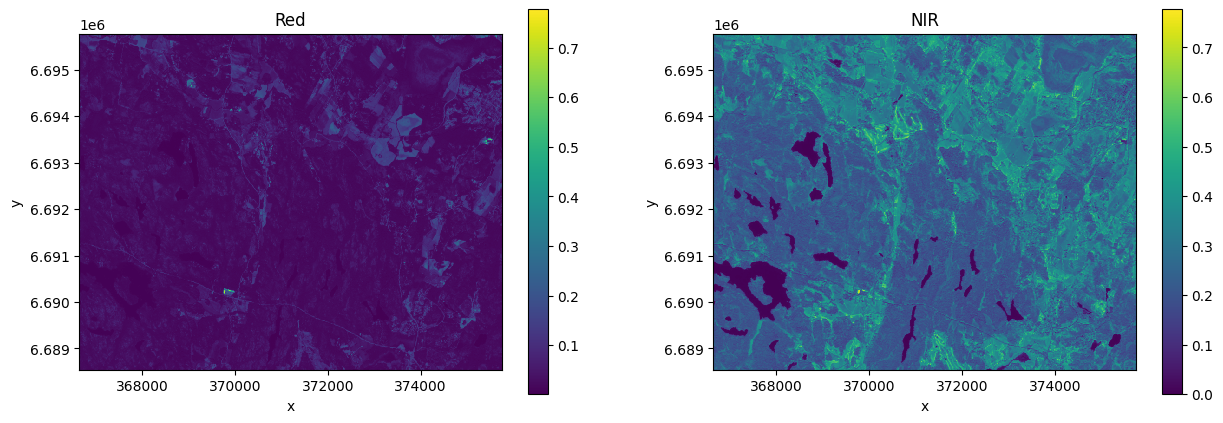

In [46]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

sentinel_raster.sel(band=4).plot(ax=axs[0])
axs[0].set_aspect('equal')
axs[0].set_title('Red')

sentinel_raster.sel(band=8).plot(ax=axs[1])
axs[1].set_aspect('equal')
axs[1].set_title('NIR')


## (2c) - Calculate the NDVI (5 points)

Calculate the NDVI using the formula provided above. Store the resulting raster as `NDVI` and export it as a `.tif` file. Finally, plot the NDVI raster. 


In [53]:
import numpy as np

ndvi = sentinel_raster.sel(band=4).copy()

red_values = sentinel_raster.sel(band=4).values
nir_values = sentinel_raster.sel(band=8).values


ndvi.values = (nir_values-red_values) / (nir_values+red_values)


ndvi.rio.to_raster(
    "data/ndvi.tif",
    tiled=True,  # GDAL: By default striped TIFF files are created. This option can be used to force creation of tiled TIFF files.
    windowed=True,  # rioxarray: read & write one window at a time
)

## (2d) - Reclassify the NDVI raster (4 points)

In this task, you will reclassify the NDVI values into distinct vegetation categories and visualize the result.

1. **Reclassify the NDVI values**: 
   - Create the following NDVI classification:
     - NDVI < 0.2: **Non-Vegetated**
     - 0.2 ≤ NDVI < 0.5: **Sparse Vegetation**
     - 0.5 ≤ NDVI: **Dense Vegetation**
   - Use appropriate values to represent each class (1 for Non-Vegetated, 2 for Sparse Vegetation, 3 for Dense Vegetation).

2. **Visualize the Reclassified NDVI**: 
   - Plot the reclassified NDVI using a discrete color map where each class has a distinct color.
   - Use a suitable color scheme to clearly differentiate between the classes (e.g., brown for Non-Vegetated, yellow for Sparse Vegetation, green for Dense Vegetation).




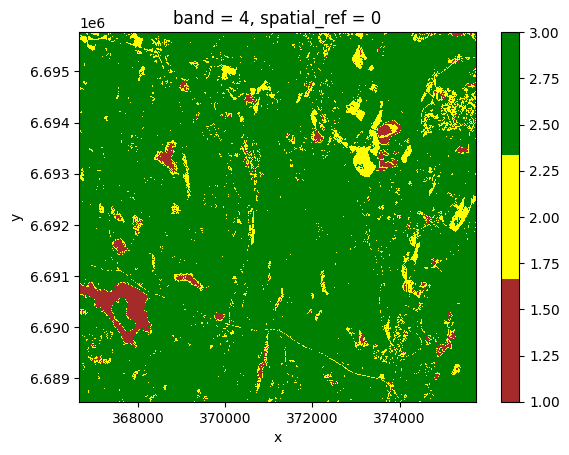

In [71]:
def map_val(val):
    if val < 0.2:
        return 1
    elif val < 0.5:
        return 2
    else:
        return 3

ndvi_classified = ndvi.copy(deep=True)
breaks = [-np.inf, 0.2, 0.5, np.inf]
ndvi_classified.values = (np.digitize(ndvi_classified.values, bins=breaks)).astype(int)

import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib

colorlist = ['brown', 'yellow', 'green']
    
cmap = matplotlib.colors.ListedColormap(colorlist)
    


ndvi_classified.plot(cmap=cmap)

### **Answer these questions**:
   - Q1: How does the distribution of vegetation classes compare across the area?
   - Q2: Are there more areas with sparse or dense vegetation?

-- Your answers


## (2e) Optional Raster value histogram - (0 point)

Use your previous skills with `matplotlib` to create a histogram of the raster values from the original NDVI raster (before reclassification). The histogram should visualize the distribution of NDVI values across the dataset, providing insights into the spread and frequency of different vegetation index values. Customize the bins and labels as needed to make the plot clear and informative.


Text(0, 0.5, 'Density')

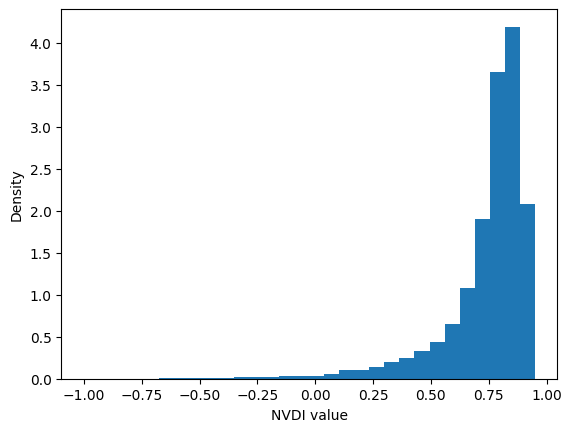

In [80]:
plt.hist(ndvi.values.flatten(), density=True, bins=30)
plt.xlabel('NVDI value')
plt.ylabel('Density')